In [1]:
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image


# NGS HW1

1. Определить средний GC-состав ридов и его распределение. Распределение GC состава есть график, на котором по оси x отложен GC состав, а по оси y — его частота, то есть количество ридов с соответствующим составом.

In [2]:
# Считает gc-content по всем ридам
def read_gc_content(path, min_qual=0):
    gc = []

    for record in SeqIO.parse(path, 'fastq'):
        seq = record.seq
        quals = record.letter_annotations['phred_quality']
        gc_per_line = 0
        for i in range(len(seq)):
            if seq[i] == 'C' or seq[i] == 'G' and quals[i] > min_qual:
                gc_per_line += 1

        gc_per_line /= len(seq)
        gc.append(gc_per_line)
    gc = sorted(gc)
    return gc

In [3]:
# Считает кол-во ридов с gc-content от 1% до 100%
def get_gc_freq(gc):
    content = [0 for i in range(101)]
    for i in range(len(content)):
        content[i] += 0.01*i
    freq = [0 for i in range(101)]

    unique, counts = np.unique(gc, return_counts=True)
    for i in range(len(unique)):
        freq[(int(unique[i]*100))] = counts[i]

    return content, freq

#### Распределение GC-состава:

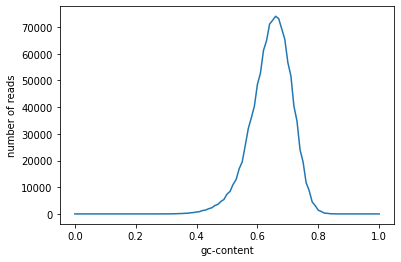

In [7]:
gc = read_gc_content('./frag.R1.fastq', min_qual=40)
unique, counts = get_gc_freq(gc)
plt.plot(unique, counts)
plt.gca().set(xlabel='gc-content', ylabel='number of reads')
plt.show()

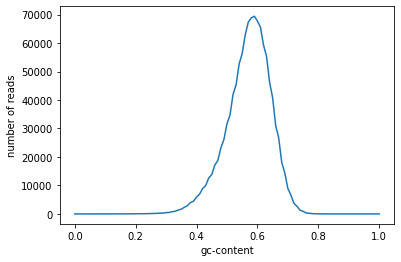

In [23]:
gc = read_gc_content('./frag.R2.fastq', min_qual=40)
unique, counts = get_gc_freq(gc)
plt.plot(unique, counts)
plt.gca().set(xlabel='gc-content', ylabel='number of reads')
plt.show()

2. По FASTQ файлу построить распределение вероятности ошибки в зависимости от позиции нуклеотида.

In [4]:
# Считает среднее качество по всем позициям ридов
def get_quality_pos(path):

    quals = []    
    
    for record in SeqIO.parse(path, 'fastq'):
        qual = record.letter_annotations['phred_quality']
        quals.append(qual)


    positions = [i for i in range(len(quals[0]))]
    #probs = [0 for i in range(len(quals[0]))]
    #for i in range(len(probs)): # why??
    #    probs[i] += 0.01*i

    #for i in range(len(quals)):
    #    for j in range(len(quals[i])):
    #        probs[j] += quals[i][j]
    boxpl = []
    for i in range(len(quals[0])):
        pos = []
        for j in range(len(quals)):
            boxpl.append(quals[j][i]) 
    
    #length = len(quals)
    #probs = [probs[i]/length for i in range(len(probs))]
    sns.boxplot(data=boxpl)
    
    return positions, probs

#### Распределеие вероятности ошибки:

In [ ]:
positions, probs = get_quality_pos('./frag.R1.fastq')
#plt.plot(positions, probs)
#plt.gca().set(xlabel='position in read', ylabel='average quality')
#plt.show()

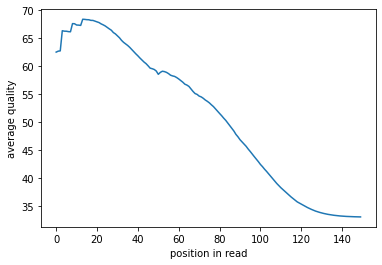

In [29]:
positions, probs = get_quality_pos('./frag.R2.fastq')
plt.plot(positions, probs)
plt.gca().set(xlabel='position in read', ylabel='average quality')
plt.show()

#### Посмотрим на fastqc:

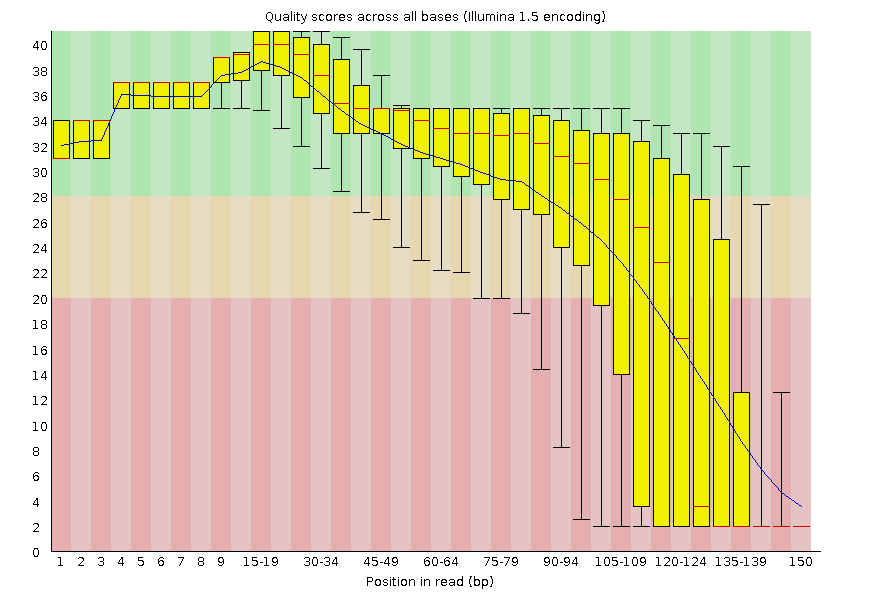

In [22]:
Image("./R1_qual.png")

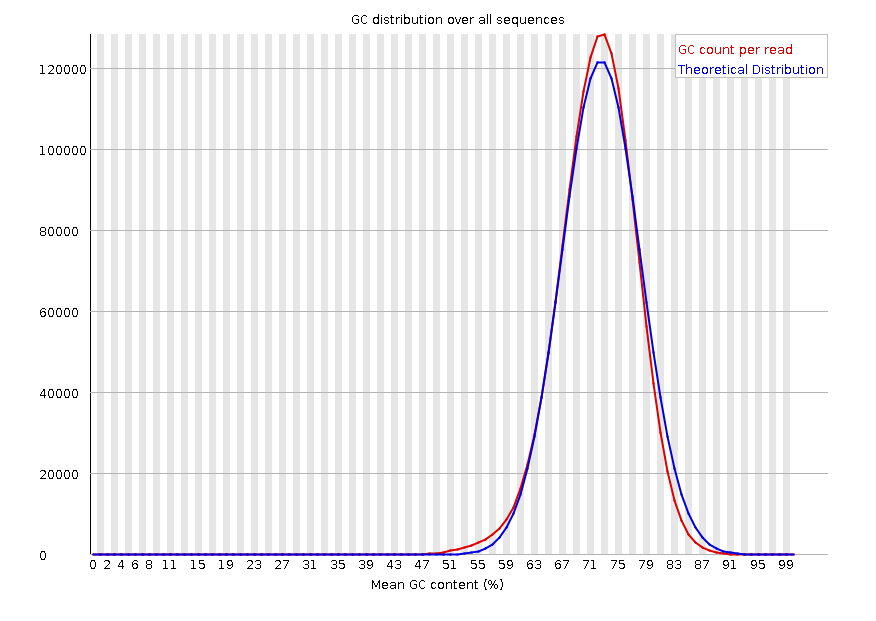

In [24]:
Image("./R1_gc.png")

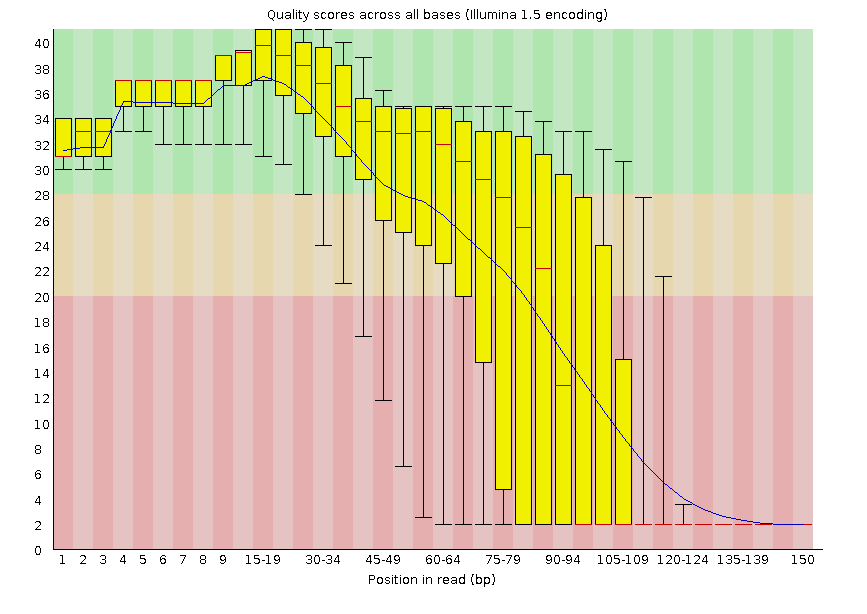

In [27]:
Image("./R2_qual.png")

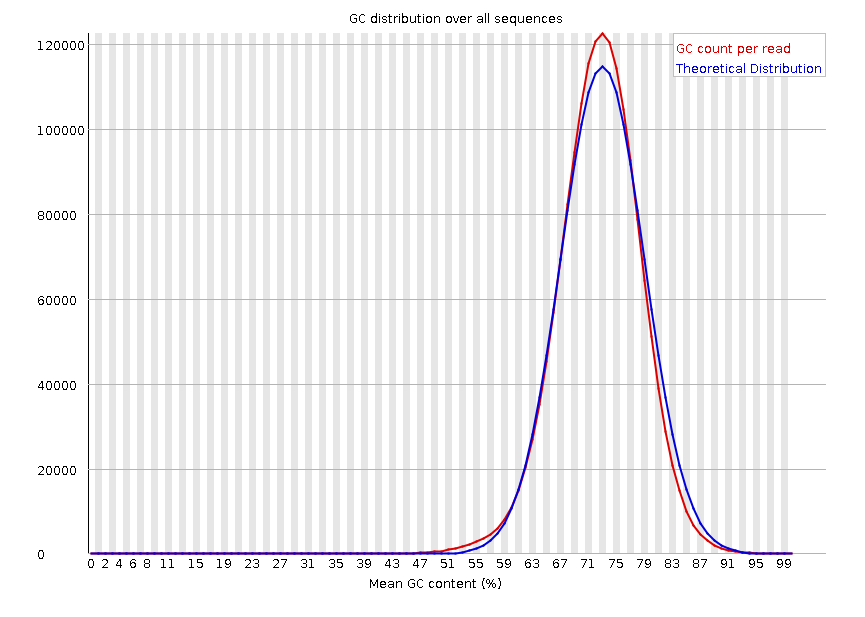

In [28]:
Image("./R2_gc.png")

# Замечание: форма графиков выглядит как надо, но что-то не так со значениями, нужно исправить